# Two-Band Model for Mg2Si-Sn System

In [1]:
'A_n' in get_ipython().user_ns

False

In [ ]:
# !pip install OriginExt

In [24]:
%reset -f

In [26]:
whos

Interactive namespace is empty.


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Define the constants

In [3]:
kb1 = 8.6173303e-5
kb=1.3807e-23; e=1.60219e-19; m0=9.1095e-31; h=6.62626e-34; hbar = h/(2*np.pi)

## Load the SPB data

In [68]:
SPB_data_full = pd.read_csv('1KA56G-fit1.csv')
SPB_data_full.dropna(axis=1, how='all', inplace=True)
col_names = ['Temp', 'Seebeck_fit', 'Sigma_fit', 'Kappa_fit', 'kappaL_SPB',
       'ZT_fit', 'ZT_calc', 'eta_SPB', 'rH_SPB', 'mD/m0_SPB', 'mu0_SPB',
       'L_SPB', 'psi_SPB', 'beta_SPB', 'mD_SPB', 'n_SPB', 'muH_SPB',
       'PF', 'T_SPB']
SPB_data_full.columns = col_names
SPB_data_full.head()

,Temp,Seebeck_fit,Sigma_fit,Kappa_fit,kappaL_SPB,ZT_fit,ZT_calc,eta_SPB,rH_SPB,mD/m0_SPB,mu0_SPB,L_SPB,psi_SPB,beta_SPB,mD_SPB,n_SPB,muH_SPB,PF,T_SPB
0,300,6.40e-05,293190.0,6.81,4.94,0.05,0.05,4.3,1.03,1.23,0.02,2.12e-08,2511.6,7083.7,1.12e-30,2.45e+26,7.74e-03,1.20e-03,300.0
1,310,6.54e-05,287420.0,6.64,4.75,0.06,0.06,4.2,1.04,1.21,0.02,2.11e-08,2453.5,7639.8,NaN,NaN,7.60e-03,1.23e-03,310.0
2,320,6.68e-05,281710.0,6.47,4.57,0.06,0.06,4.1,1.04,1.20,0.02,2.10e-08,2396.1,8228.9,NaN,NaN,7.45e-03,1.26e-03,320.0
3,330,6.82e-05,276070.0,6.31,4.40,0.07,0.07,4.0,1.04,1.19,0.02,2.09e-08,2339.6,8851.3,NaN,NaN,7.31e-03,1.28e-03,330.0
4,340,6.97e-05,270490.0,6.15,4.24,0.07,0.07,3.9,1.04,1.18,0.01,2.09e-08,2284.1,9507.6,NaN,NaN,7.18e-03,1.31e-03,340.0


In [69]:
v_l=0; d=0; x = 1.0; N_A = 0;

In [70]:
T_fit = np.arange(300,720,20)

In [71]:
T_fit

array([300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540,
       560, 580, 600, 620, 640, 660, 680, 700])

In [72]:
len(eta_SPB)

41

In [77]:
SPB_data_df = SPB_data_full.iloc[0::2,:]
SPB_data_df.head()

,Temp,Seebeck_fit,Sigma_fit,Kappa_fit,kappaL_SPB,ZT_fit,ZT_calc,eta_SPB,rH_SPB,mD/m0_SPB,mu0_SPB,L_SPB,psi_SPB,beta_SPB,mD_SPB,n_SPB,muH_SPB,PF,T_SPB
0,300,6.40e-05,293190.0,6.81,4.94,0.05,0.05,4.30,1.03,1.23,0.02,2.12e-08,2511.6,7083.7,1.12e-30,2.45e+26,7.74e-03,1.20e-03,300.0
2,320,6.68e-05,281710.0,6.47,4.57,0.06,0.06,4.10,1.04,1.20,0.02,2.10e-08,2396.1,8228.9,NaN,NaN,7.45e-03,1.26e-03,320.0
4,340,6.97e-05,270490.0,6.15,4.24,0.07,0.07,3.90,1.04,1.18,0.01,2.09e-08,2284.1,9507.6,NaN,NaN,7.18e-03,1.31e-03,340.0
6,360,7.26e-05,259540.0,5.86,3.93,0.08,0.08,3.72,1.04,1.16,0.01,2.07e-08,2176.6,10922.0,NaN,NaN,6.90e-03,1.37e-03,360.0
8,380,7.57e-05,248870.0,5.59,3.66,0.10,0.10,3.53,1.05,1.15,0.01,2.05e-08,2074.2,12468.0,NaN,NaN,6.64e-03,1.43e-03,380.0


In [78]:
SPB_data = SPB_data_df.values

In [79]:
np.set_printoptions(precision=2)
pd.set_option("display.precision", 2)

## Define the 2 PB Param 

In [80]:
mD_p = SPB_data[0,14]
n_p = SPB_data[0,15]

Nv_p = 2
Nv_n = 3
U = 0.5

Sound Velocity: $ v_l = 946.8 x^2 - 3998 x + 7837 $

Material Density: $ d = 1.88*10^3(1-x) + 3.59*10^3 x $

In [81]:
if v_l==0:
    v_l = 946.8*x**2 - 3998*x + 7837
if d==0: 
    d = 1.88e3*(1-x) + 3.59e3*x #density
if N_A:
    N_A = lambda x: ( (4.68441009080682e+28)*(1-x)+ (3.879386800347e+28)*x)

C_l = 4.15e10*(1-x) + 3.22e10*x;


In [82]:
if x<0.7: #Si rich side   # 0.6992
    mD_n = 1.1*m0
    Edef_n = 17
elif x>0.7: #Sn rich side
    mD_n = 1.7598*m0
    Edef_n = 10

$$ {\varepsilon _g}{\rm{ }} = {\rm{ }}\left( {\frac{1}{{{k_{b1}}\,\,T}}} \right)\,\,\left\{ {(0.78\,\, - \,\,4.0 \times {{10}^{ - 4}}T)\,(1 - x){\rm{ }} + {\rm{ }}(0.38\,\, - \,\,2.8 \times {{10}^{ - 4}}T).\,x} \right\} $$

$$ {S_{{\rm{tot}}}} = \left( {\frac{{{S_p}\,{\sigma _p} + {S_n}\,{\sigma _n}}}{{{\sigma _p} + {\sigma _n}}}} \right)$$


$$ {S_{{\rm{tot}}}} = \left( {\frac{{{k_B}}}{e}} \right)\frac{{\left[ {{A_p}\,\tau _{p,{\rm{optim}}}^0\,{I_1}\,\left( \eta  \right)} \right]\,\, + \,\,\left[ {( - ){A_n}\,\tau _n^0\,{I_1}\left( { - \eta  - {\varepsilon _g}} \right)} \right]}}{{\left[ {{A_p}\,\tau _{p,{\rm{optim}}}^0{I_2}\,\left( \eta  \right)} \right]\,\, + \,\,\left[ {{A_n}\,\tau _n^0\,{I_2}\left( { - \eta  - {\varepsilon _g}} \right)} \right]}}\, $$

$${A_p} = \frac{{ - 8\,\pi {e^2}\,{\rm{Nv}}_p^{2/3}{{\left( {m_p^*} \right)}^{1/2}}{{\left( {2{k_B}T} \right)}^{3/2}}}}{{3\,{h^3}}} $$

$${A_n} = \frac{{ - 8\,\pi {e^2}\,\,{\rm{Nv}}_n^{2/3}{{\left( {m_n^*} \right)}^{1/2}}{{\left( {2{k_B}T} \right)}^{3/2}}}}{{3\,{h^3}}}$$

In [83]:
pi = np.pi
T = T_fit
#     print('%d %5.3E %5.3E %5.3f' %(k, S, Sigma, kappa_tot_exp))

A_p = (-8*np.pi*(e**2)*(Nv_p)**(2/3)*(mD_p)**(0.5)*(2*kb*T)**(3/2)) / (3*h**3)
A_n = (-8*np.pi*(e**2)*(Nv_n)**(2/3)*(mD_n)**(0.5)*(2*kb*T)**(3/2)) / (3*h**3)
print([A_p, A_n])

[array([-9.35e+17, -1.03e+18, -1.13e+18, -1.23e+18, -1.33e+18, -1.44e+18,
       -1.55e+18, -1.66e+18, -1.78e+18, -1.89e+18, -2.01e+18, -2.13e+18,
       -2.26e+18, -2.38e+18, -2.51e+18, -2.64e+18, -2.78e+18, -2.91e+18,
       -3.05e+18, -3.19e+18, -3.33e+18]), array([-1.47e+18, -1.62e+18, -1.77e+18, -1.93e+18, -2.09e+18, -2.26e+18,
       -2.43e+18, -2.61e+18, -2.79e+18, -2.97e+18, -3.16e+18, -3.35e+18,
       -3.54e+18, -3.74e+18, -3.95e+18, -4.15e+18, -4.36e+18, -4.57e+18,
       -4.79e+18, -5.01e+18, -5.23e+18])]


$$\tau _{{\rm{AP}},\,n}^0 = \frac{{\pi {\hbar ^4}\,v_l^2\,d}}{{\sqrt 2 \,\Xi _{{\rm{def}},\,n}^2\,{{\left( {m_n^*\,{k_{B\,}}\,T} \right)}^{3/2}}}}$$

$$\tau _{{\rm{A}}S,\,n}^0 = \frac{{8\,{\hbar ^4}\,{N_A}}}{{3\sqrt 2 \,\pi \,x\left( {1 - x} \right)\,U_n^2\,{{\left( {m_n^*\,} \right)}^{3/2}}{{\left( {{k_{B\,}}\,T} \right)}^{1/2}}}}$$

$$\frac{1}{{\tau _n^0}} = \frac{1}{{\tau _{{\rm{AP}},n}^0}} + \frac{1}{{\tau _{{\rm{A}}S,n}^0}}$$

In [84]:
#     print('optim for p')
Edef_p = []
# tau0_AS_n = np.zeros(len(T_fit))
# tau0_AP_n = np.zeros(len(T_fit))
# Tau0_n = np.zeros(len(T_fit))

tau0_AS_n = ((8*hbar**4)*N_A) / (  3*np.sqrt(2)*pi*x*(1-x)*(U*e)**2*(mD_n/(Nv_n**(2/3)))**1.5*(kb *T)**0.5  )
tau0_AP_n = (pi* hbar**4 * v_l**2*d) / (np.sqrt(2)*(Edef_n*e)**2 * ( (mD_n/(Nv_n**(2/3)))*kb *T)**1.5)

if (x>0) & (x<1):
    Tau0_n = ( (tau0_AP_n)**-1 + (tau0_AS_n)**-1 )**-1
else:
    Tau0_n = tau0_AP_n


$$ {E_{n1}}(T,x){\rm{ }} = \left[ {\left\{ {0.78 + 0.4 - (4.0 \times {{10}^{ - 4}}T)} \right\}*(1 - x){\rm{ }} + {\rm{ }}\left\{ {0.38{\rm{ }} - (2.8 \times {{10}^{ - 4}}T)} \right\}*x} \right]\,\,\,eV $$

$$ {E_{n2}}(T,x){\rm{ }} = \left[ {\left\{ {0.78 - (4.0 \times {{10}^{ - 4}}T)} \right\}*(1 - x){\rm{ }} + {\rm{ }}\left\{ {0.38 + 0.165 - (2.8 \times {{10}^{ - 4}}T)} \right\}*x} \right]\,\,\,eV $$

In [85]:
kb1 = 8.6173303e-5
# # BG1 = 0.7650; BG2 = 4.3; BG3 = 0.43; p1 = 0.34; q = 3.5; r = 0.195;
# BG1 = 0.78; BG2 = -4; BG3 = 0.4; p1 = 0.38; q = 2.8; r = 0.165; #%% Literature values

# E_n1 = lambda T1,x: (1/(kb1*T1))*( (BG1 - (BG2*1e-4)*T1 + BG3)*(1-x) + (p1 - (q*1e-4)*T1)*x)
# E_n2 = lambda T1,x: (1/(kb1*T1))*( (BG1 - (BG2*1e-4)*T1)*(1-x) + (p1 + r - (q*1e-4)*T1)*x)

# if x<0.70796: #% Si rich side
#     Eg_red = E_n2
# elif x>0.70796: #% Sn rich side
#     Eg_red = E_n1
# else: Eg_red = 0

Eg_red = lambda T1,x: (1/(kb1*T1))*( (0.78 - 4e-4*T1)*(1-x) + (0.38 - 2.8e-4*T1)*x )

In [86]:
Eg_red(300,1)

11.449795149045949

In [87]:
import scipy.integrate as integrate
from scipy.optimize import fsolve
from scipy import stats

#Fermi Integrals
# FI= lambda ene,eta,j1: (ene**j1)/(1+np.exp(ene-eta))
F1 = lambda ene,eta: (ene-eta)*(ene)*((-np.exp(ene - eta))/(np.exp(ene - eta) + 1)**2)
F2 = lambda ene,eta: (ene)*((-np.exp(ene - eta))/(np.exp(ene - eta) + 1)**2)
F3 = lambda ene,eta: ((ene-eta)**2)*(ene)*((-np.exp(ene - eta))/(np.exp(ene - eta) + 1)**2)

def F(eta,j1):
    return integrate.quad(lambda ene,eta,j1: (ene**j1)/(1+np.exp(ene-eta)), \
                          0, np.inf, args=(eta, j1))[0]

def I1(eta):
    return integrate.quad(F1, 0, 50, args=(eta))[0]

def I2(eta):
    return integrate.quad(F2, 0, 50, args=(eta))[0]

def I3(eta):
    return integrate.quad(F3, 0, 50, args=(eta))[0]

    

In [88]:
I1(0)

-1.6449340668482266

In [89]:
# S_iter=0; Sigma_iter = 0; A_n_iter = A_n[0]; A_p_iter = A_p[0]

def solve_sbk_sigma(var):
#     global Tau0_n_iter, kb, e, T_iter, x, S_p_fun, S_n_fun
#     global Eg_red, I1, I2, A_p, A_n, S, Sigma, Sigma_p_fun, Sigma_n_fun 
    global Sigma_p_fun, Sigma_n_fun, Sigma_SPB_fun, S_p_fun, S_n_fun, S_DPB_fun
    
    eta = var[0]
    Tau0_p_var = var[1]
    
#     print(A_p, A_n)
#     print(S_iter, Sigma_iter)
    
    Sigma_p_fun = lambda eta, Tau0_p_var: A_p_iter*Tau0_p_var* I2(eta)
    Sigma_n_fun = lambda eta: (A_n_iter)*Tau0_n_iter* I2(-eta-Eg_red(T_iter,x))
    Sigma_SPB_fun = lambda eta, Tau0_p_var: Sigma_p_fun(eta, Tau0_p_var) + Sigma_n_fun(eta)

    S_p_fun = lambda eta: (kb/e)*I1(eta) / I2(eta)
    S_n_fun = lambda eta: (-kb/e)*I1(-eta-Eg_red(T_iter,x)) / I2(-eta-Eg_red(T_iter,x))
    S_DPB_fun = lambda eta, Tau0_p_var: ( S_p_fun(eta)*Sigma_p_fun(eta, Tau0_p_var) + S_n_fun(eta)*Sigma_n_fun(eta) ) / Sigma_SPB_fun(eta, Tau0_p_var)

    Fun = np.zeros(2)
    Fun[0] = (S_DPB_fun(eta, Tau0_p_var) - S_iter)*1e6
    Fun[1] = (Sigma_SPB_fun(eta, Tau0_p_var) - Sigma_iter)*1e-2

    return Fun

def solver_DPB(eta_SPB_iter, Tau0_n_iter):

    # global T_iter x %v_l d mD_p hbar U;
#     print(eta_SPB_iter, Tau0_n_iter)
    x_1 = np.linspace(eta_SPB_iter-0.5, eta_SPB_iter+0.5, 5)
#     x_1 = np.linspace(-0.6, +0.6, 10)
    print(x_1)
    
    
    eta_final = np.zeros(len(x_1)); Tau0_p_var_optim = np.zeros(len(x_1))
    exitflag_final = np.zeros(len(x_1)); FO_opt = np.zeros(len(x_1))
    
    for i in range(0,len(x_1)):    
        x0 = [x_1[i], Tau0_n_iter]
#         print(x0)
#         options = optimoptions('fsolve', 'Algorithm', 'trust-region-dogleg',...
#             'FunctionTolerance', 1e-20, 'MaxFunctionEvaluations', 200, ...
#             'StepTolerance', 1e-20, 'MaxIterations', 200, 'OptimalityTolerance', 1e-20,...
#             'Display', 'none');
#              %'PlotFcn', '@optimplotfirstorderopt', 'Display', 'iter-detailed');

        sol = fsolve(solve_sbk_sigma,x0, full_output=1, xtol=1e-20, maxfev=500 )
        print('%1.20f, %1.20E' %(sol[0][0], sol[0][1]))
        eta_final[i] = sol[0][0]
        Tau0_p_var_optim[i] = sol[0][1]
        
    print(stats.mode(eta_final))
    print(stats.mode(Tau0_p_var_optim))
    print('%1.20f, %1.20E' %(stats.mode(eta_final)[0], stats.mode(Tau0_p_var_optim)[0]))
    print('%1.20f, %1.20E' %(eta_final.mean(), Tau0_p_var_optim.mean()) )
    
    
    return [stats.mode(eta_final)[0], stats.mode(Tau0_p_var_optim)[0]]


In [124]:
S_exp = SPB_data_df['Seebeck_fit'].values
Sigma_exp = SPB_data_df['Sigma_fit'].values
eta_SPB = SPB_data_df['eta_SPB'].values
kappa_exp = SPB_data_df['Kappa_fit'].values
Sigma_exp

array([293190., 281710., 270490., 259540., 248870., 238500., 228440.,
       218710., 209330., 200310., 191670., 183420., 175570., 168150.,
       161170., 154640., 148580., 143010., 137940., 133380., 129360.])

In [91]:
eta_optim_DPB = np.zeros(len(T)); Tau0_p_DPB = np.zeros(len(T))
tau0_AP_p = np.zeros(len(T)); tau0_AS_p = np.zeros(len(T))
Tau0_p = np.zeros(len(T)); Edef_p_DPB = np.zeros(len(T))
sqrt = np.sqrt
S_DPB = np.zeros(len(T)); Sigma_DPB = np.zeros(len(T))
Sigma_p_DPB = np.zeros(len(T)); Sigma_n_DPB = np.zeros(len(T))
S_p = np.zeros(len(T)); S_n = np.zeros(len(T))
tau0_AS_n = np.zeros(len(T)); tau0_AP_n = np.zeros(len(T));  Tau0_n = np.zeros(len(T))

global Sigma_p_fun, Sigma_n_fun, Sigma_SPB_fun, S_p_fun, S_n_fun, S_DPB_fun

from scipy.optimize import fsolve, root
# print(' T       eta_SPB        eta_optim_DPB       Tau0_p_DPB')
for k in range(0,len(T)):
    T_iter = T[k]; S_iter = S_exp[k]; Sigma_iter = Sigma_exp[k]
    A_p_iter = A_p[k]; A_n_iter = A_n[k]; 
    eta_iter =eta_SPB[k]; Tau0_n_iter = Tau0_n[k] 

    tau0_AS_n[k] = ((8*(hbar**4))*N_A) / (  3*np.sqrt(2)*pi*x*(1-x)*(U*e)**2*(mD_n/(Nv_n**(2/3)))**1.5*(kb *T[k])**0.5  )
    tau0_AP_n[k] = (pi* hbar**4* (v_l**2)*d) / (np.sqrt(2)*(Edef_n*e)**2 * ( (mD_n/(Nv_n**(2/3)))*kb *T[k])**1.5)

    if (x>0) and (x<1):
        Tau0_n[k] = ( (tau0_AP_n[k])**-1 + (tau0_AS_n[k])**-1 )**-1
    else:
        Tau0_n[k] = tau0_AP_n[k]

    Tau0_n_iter = Tau0_n[k]
    
#     print(A_p_iter, A_n_iter)
    eta_optim_DPB[k], Tau0_p_DPB[k] = solver_DPB(eta_iter, 1e-14)
    
    
#     print('%d \t %1.5f \t %1.5f \t %1.4E'\
#           %(T[k], eta_SPB[k], eta_optim_DPB[k], Tau0_p_DPB[k] ))
    
    tau0_AS_p[k] = ((8*hbar**4)*N_A) / (  3*sqrt(2)*pi*x*(1-x)*(U*e)**2*(mD_p/(Nv_p**(2/3)))**1.5*(kb *T[k])**0.5  )
        
    if (x>0 and x<1):
        tau0_AP_p[k] = (Tau0_p_DPB[k] * tau0_AS_p[k])/(tau0_AS_p[k] - Tau0_p_DPB[k] )
    else:
        tau0_AP_p[k] = Tau0_p_DPB[k]
        
    Edef_p_DPB[k] = sqrt( (pi* hbar**4* v_l**2*d) / (sqrt(2)*tau0_AP_p[k] * ((mD_p/(Nv_p**(2/3)))*kb*T[k])**1.5)  ) / e;
    Tau0_p[k] = Tau0_p_DPB[k]  

    print('\n%d \t %1.5f \t %1.5f \t %1.5E \t %1.4f \t %1.4f' \
          %(T_iter, eta_SPB[k], eta_optim_DPB[k], Tau0_p_DPB[k], \
            Edef_p_DPB[k], Eg_red(T_iter,x)*(kb1*T_iter)))
   
    Sigma_p_DPB[k] = Sigma_p_fun(eta_optim_DPB[k],Tau0_p_DPB[k])
    Sigma_n_DPB[k] = Sigma_n_fun(eta_optim_DPB[k])
    Sigma_DPB[k] = Sigma_p_DPB[k] + Sigma_n_DPB[k]
        
    S_p[k] = S_p_fun(eta_optim_DPB[k])
    S_n[k] = S_n_fun(eta_optim_DPB[k])
    S_DPB[k] = ( S_p[k]*Sigma_p_DPB[k] + S_n[k]*Sigma_n_DPB[k] ) / Sigma_DPB[k]
    

[3.8  4.05 4.3  4.55 4.8 ]
4.30148906556612509178, 7.26810455491208448717E-14
4.30148906556612509178, 7.26810455491208070064E-14
4.30148906556612509178, 7.26810455491208196282E-14
4.30148906556612509178, 7.26810455491208070064E-14
4.30148906556612420360, 7.26810455491208448717E-14
ModeResult(mode=array([4.3]), count=array([4]))
ModeResult(mode=array([7.27e-14]), count=array([2]))
4.30148906556612509178, 7.26810455491208070064E-14
4.30148906556612509178, 7.26810455491208322500E-14

300 	 4.30150 	 4.30149 	 7.26810E-14 	 8.7750 	 0.2960
[3.6  3.85 4.1  4.35 4.6 ]
4.10006637260044204396, 6.64474356324039491123E-14
4.10006637260043937943, 6.64474356324039869777E-14
4.10006637260044115578, 6.64474356324039491123E-14
4.10006637260044204396, 6.64474356324039491123E-14
4.10006637260044115578, 6.64474356324039617341E-14
ModeResult(mode=array([4.1]), count=array([2]))
ModeResult(mode=array([6.64e-14]), count=array([3]))
4.10006637260044115578, 6.64474356324039491123E-14
4.10006637260044115578, 

2.14847084773454799489, 2.58675306332041376113E-14
2.14847084773454710671, 2.58675306332041439221E-14
2.14847084773454621853, 2.58675306332041344558E-14
2.14847084773454799489, 2.58675306332041439221E-14
ModeResult(mode=array([2.15]), count=array([2]))
ModeResult(mode=array([2.59e-14]), count=array([2]))
2.14847084773454710671, 2.58675306332041439221E-14
2.14847084773454710671, 2.58675306332041407667E-14

600 	 2.17300 	 2.14847 	 2.58675E-14 	 8.7460 	 0.2120
[1.61 1.86 2.11 2.36 2.61]
2.07391656651537426015, 2.43695152391929196596E-14
2.07391656651537426015, 2.43695152391929196596E-14
2.07391656651537426015, 2.43695152391929228150E-14
2.07391656651537381606, 2.43695152391929228150E-14
2.07391656651537559242, 2.43695152391929196596E-14
ModeResult(mode=array([2.07]), count=array([3]))
ModeResult(mode=array([2.44e-14]), count=array([3]))
2.07391656651537426015, 2.43695152391929196596E-14
2.07391656651537470424, 2.43695152391929196596E-14

620 	 2.10690 	 2.07392 	 2.43695E-14 	 8.7919 	

In [92]:
x

1.0

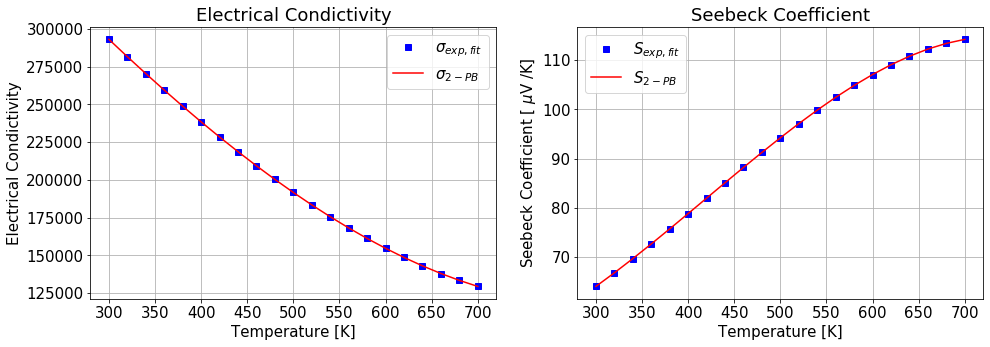

In [120]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[1].plot(T, S_exp*1e6, 'bs')
axes[1].plot(T, S_DPB*1e6, 'r-')
axes[1].legend(['$S_{exp,fit}$','$S_{2-PB}$'])
axes[1].set_xlabel('Temperature [K]')
axes[1].set_ylabel('Seebeck Coefficient [ $\mu$V /K]')
axes[1].set_title('Seebeck Coefficient')
axes[1].grid(True)

axes[0].plot(T, Sigma_exp, 'bs')
axes[0].plot(T, Sigma_DPB, 'r-')
axes[0].set_xlabel('Temperature [K]')
axes[0].set_ylabel('Electrical Condictivity')
axes[0].set_title('Electrical Condictivity')
axes[0].legend(['$\sigma_{exp,fit}$','$\sigma_{2-PB}$'])
axes[0].grid(True)

plt.show()

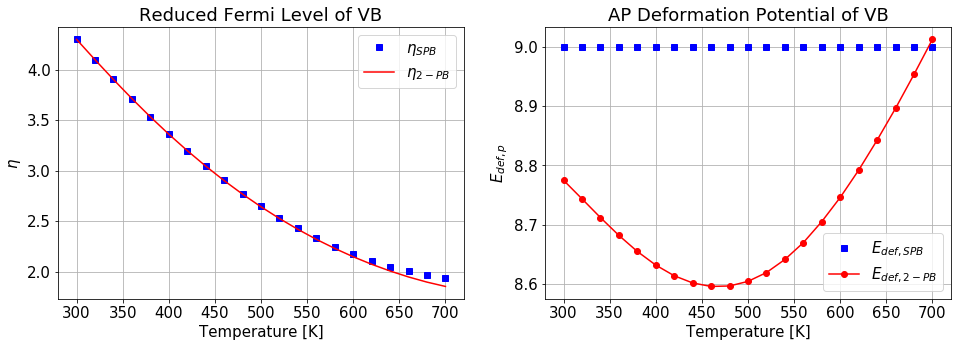

In [105]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

col_idx = [1,2,3]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].plot(T, eta_SPB, 'bs')
axes[0].plot(T, eta_optim_DPB, 'r-')
axes[0].legend(['$\eta_{SPB}$','$\eta_{2-PB}$'])
axes[0].set_xlabel('Temperature [K]')
axes[0].set_ylabel('$\eta$')
axes[0].set_title('Reduced Fermi Level of VB')
axes[0].grid(True)

axes[1].plot(T, 9.0*np.ones(len(T)), 'bs')
axes[1].plot(T, Edef_p_DPB, 'r-o')
axes[1].set_xlabel('Temperature [K]')
axes[1].set_ylabel('$E_{def,p}$')
axes[1].set_title('AP Deformation Potential of VB')
axes[1].legend(['$E_{def,SPB}$','$E_{def,2-PB}$'])
axes[1].grid(True)

plt.show()

,T,S_2PB,Sigma_2PB
0,300.0,6.40e-05,293190.0
1,320.0,6.68e-05,281710.0
2,340.0,6.97e-05,270490.0
3,360.0,7.26e-05,259540.0
4,380.0,7.57e-05,248870.0


In [233]:
n_DPB =  np.ones(len(T))*np.nan; p_DPB = np.ones(len(T))*np.nan; rH_p = np.ones(len(T))*np.nan; 
rH_n = np.ones(len(T))*np.nan; #RH = np.ones(len(T))*np.nan; RH_1 = np.ones(len(T))*np.nan;
kappaE_p = np.ones(len(T))*np.nan; kappaE_n = np.ones(len(T))*np.nan; 
kappa_bip_DPB = np.ones(len(T))*np.nan; 
kappaE_tot_DPB = np.ones(len(T))*np.nan; kappaL_DPB = np.ones(len(T))*np.nan
L_DPB = np.ones(len(T))*np.nan; muH_DPB = np.ones(len(T))*np.nan

for k in range(0,len(T)):
#     print(k)
    T_iter = T[k]; S_iter = S_exp[k]; Sigma_iter = Sigma_exp[k]
    A_p_iter = A_p[k]; A_n_iter = A_n[k]; 
    eta_iter =eta_SPB[k]; Tau0_n_iter = Tau0_n[k] 
    kappa_tot_exp = kappa_exp[k]
    
    p_DPB[k] = (4*pi*(2*mD_p*kb*T[k])**(3/2) ) *F(eta_optim_DPB[k],0.5) / (h**3);
    n_DPB[k] = (4*pi*(2*mD_n*kb*T[k])**(3/2) ) *F(-eta_optim_DPB[k]-Eg_red(T_iter,x),0.5) / (h**3);
#     print(k, p[k], n[k])
    
    rH_p[k] = 1.5*F(eta_optim_DPB[k],0.5)*(0.5)*F(eta_optim_DPB[k],(-0.5)) / (F(eta_optim_DPB[k],0))**2;
    rH_n[k] = 1.5*F(-eta_optim_DPB[k]-Eg_red(T_iter,x),0.5)*(0.5)*F(-eta_optim_DPB[k]-Eg_red(T_iter,x),(-0.5)) / (F(-eta_optim_DPB[k]-Eg_red(T_iter,x),0))**2;

#     % RH experimental = 4.6e+8
#     RH[k] = (1/e)*(rH_p[k]*p[k] + rH_n[k]*n[k]*b**2) / ((p[k]+n[k]*b)**2);
#     RH_1[k] = rH_p[k]/(p[k]*e);

    kappaE_p[k] = ( ((A_p[k]/(e**2))*(kb**2)*T[k]*(Tau0_p[k])) * I3(eta_optim_DPB[k]) ) - (T[k]*Sigma_p_DPB[k]*(S_p[k]**2))
    kappaE_n[k] = ( ((A_n[k]/(e**2))*(kb**2)*T[k]*(Tau0_n[k])) * I3(-eta_optim_DPB[k]-Eg_red(T_iter,x)) ) - (T[k]*Sigma_n_DPB[k]*(S_n[k]**2))
#     print(k, kappaE_p[k], kappaE_n[k])
    
    kappa_bip_DPB[k] =   (  T[k]*(Sigma_p_DPB[k]*Sigma_n_DPB[k]) * ((S_n[k] - S_p[k])**2)   )  / Sigma_DPB[k] 

    kappaE_tot_DPB[k] = (kappaE_p[k] + kappaE_n[k]) + kappa_bip_DPB[k]
    kappaL_DPB[k] = kappa_tot_exp - kappaE_tot_DPB[k]

    L_DPB[k] = kappaE_tot_DPB[k]/(Sigma_DPB[k]*T[k])    
#     muH_DPB[k] = RH[k]*Sigma_DPB[k]

    #     ZT_DPB[k] = (S_DPB[k]**2)*Sigma_DPB[k]*T[k]/kappa_exp[k]

In [135]:
kappa_bip_DPB_per = 100*kappa_bip_DPB/kappa_tot_exp
kappa_bip_DPB_per

array([2.14e-04, 6.19e-04, 1.60e-03, 3.78e-03, 8.20e-03, 1.66e-02,
       3.15e-02, 5.66e-02, 9.69e-02, 1.59e-01, 2.50e-01, 3.80e-01,
       5.59e-01, 7.99e-01, 1.11e+00, 1.51e+00, 2.00e+00, 2.60e+00,
       3.31e+00, 4.14e+00, 5.08e+00])

In [141]:
kappaL_SPB = SPB_data_df['kappaL_SPB'].values
kappa_arr = np.array([T, kappaE_p, kappaE_n, kappa_bip_DPB, kappaL_DPB, kappaL_SPB, kappa_bip_DPB_per]).T
kappa_df = pd.DataFrame(kappa_arr)
kappa_df.columns = ['T', 'kappaE_p', 'kappaE_n', 'kappa_bip_2PB', 'kappaL_2PB', 'kappaL_SPB', '%kappa_bip_DPB']
kappa_df

,T,kappaE_p,kappaE_n,kappa_bip_2PB,kappaL_2PB,kappaL_SPB,%kappa_bip_DPB
0,300.0,1.87,4.61e-08,7.88e-06,4.94,4.94,2.14e-04
1,320.0,1.90,1.51e-07,2.28e-05,4.57,4.57,6.19e-04
2,340.0,1.92,4.38e-07,5.91e-05,4.23,4.24,1.60e-03
3,360.0,1.93,1.15e-06,1.39e-04,3.93,3.93,3.78e-03
4,380.0,1.94,2.77e-06,3.02e-04,3.66,3.66,8.20e-03
5,400.0,1.93,6.19e-06,6.11e-04,3.41,3.41,1.66e-02
6,420.0,1.93,1.29e-05,1.16e-03,3.19,3.19,3.15e-02
7,440.0,1.92,2.55e-05,2.09e-03,3.00,3.00,5.66e-02
8,460.0,1.90,4.75e-05,3.57e-03,2.83,2.83,9.69e-02
9,480.0,1.88,8.45e-05,5.85e-03,2.68,2.69,1.59e-01


In [261]:
# plot of kappa ele
def kappa_ele_plot():
    import matplotlib
    matplotlib.rcParams.update({'font.size': 15})

    col_idx = [1,2,3]

    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    axes[0].plot(T, kappa_exp, 'g-o')
    axes[0].plot(T, (kappa_exp - kappaL_SPB), 'bs')
    axes[0].plot(T, kappaE_tot_DPB, 'r-')
    axes[0].set_xlabel('Temperature [K]')
    axes[0].set_ylabel('$\kappa _{electronic}$')
    axes[0].set_title('Electronic Thermal Condictivity')
    axes[0].legend(['Total $\kappa$', '$\kappa _{ele,SPB}$','$\kappa _{ele,2-PB}$'])
    axes[0].grid(True)


    axes[1].plot(T, (kappa_exp - kappaL_SPB), 'bs')
    axes[1].plot(T, kappaE_tot_DPB, 'r-')
    axes[1].set_xlabel('Temperature [K]')
    axes[1].set_ylabel('$\kappa _{electronic}$')
    axes[1].set_title('Electronic Thermal Condictivity')
    axes[1].legend(['$\kappa _{ele,SPB}$','$\kappa _{ele,2-PB}$'])
    axes[1].grid(True)

    plt.show()
    
    fig.savefig(r'Plots/kappa_ele.png')

# plot of kappa lattice
def kappa_lat_plot():
    import matplotlib
    matplotlib.rcParams.update({'font.size': 15})

    col_idx = [1,2,3]

    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    # axes[0].plot(np.log(T), np.log(kappaL_SPB), 'bs')
    # axes[0].plot(np.log(T), np.log(kappaL_DPB), 'r-o')
    p = np.poly1d(np.polyfit(np.log(T[:8]), np.log(kappaL_DPB[:8]),1))

    axes[0].plot(T, kappaL_SPB, 'bs')
    axes[0].plot(T, kappaL_DPB, 'r-o')
    axes[0].plot(T, np.exp(p(np.log(T))), 'k-')
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    axes[0].set_xlabel('Log Temperature [K]')
    axes[0].set_ylabel('log($\kappa_{Lattice}$)')
    axes[0].set_title('Log of $\kappa _{Lattice}$')
    axes[0].legend(['$\kappa L_{SPB}$','$\kappa L_{2-PB}$', 'Linear Fit'])
    axes[0].annotate(p, xy=(350, 2))

    axes[1].plot(T, kappaL_SPB, 'bs')
    axes[1].plot(T, kappaL_DPB, 'r-')
    axes[1].set_xlabel('Temperature [K]')
    axes[1].set_ylabel('$\kappa _{Lattice}$')
    axes[1].set_title('Lattice Thermal Condictivity')
    axes[1].legend(['$\kappa L_{SPB}$','$\kappa L_{2-PB}$'])
    axes[1].grid(True)
                     
    plt.show()
    fig.savefig(r'Plots/kappa_lat.png')
    
    print(p)
    
def kappa_bip_plot():
    import matplotlib
    matplotlib.rcParams.update({'font.size': 15})

    col_idx = [1,2,3]

    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    axes[0].plot(T, kappa_bip_DPB, 'r-o')
    axes[0].set_xlabel('Temperature [K]')
    axes[0].set_ylabel('$\kappa_{bipolar}$')
    axes[0].set_title('Bipolar Conductivity from 2PB Model')
    axes[0].grid(True)  

    axes[1].plot(T, 100*(kappa_bip_DPB/kappa_exp), 'b-o')
    axes[1].set_xlabel('Temperature [K]')
    axes[1].set_ylabel('% of $\kappa_{Bipolar}$')
    axes[1].set_title('% of Total $\kappa$ contributed by $\kappa_{Bipolar}$')
    # axes[1].legend(['$E_{def,SPB}$','$E_{def,2-PB}$'])
    axes[1].grid(True)

    plt.show()
    fig.savefig(r'Plots/kappa_bip.png')

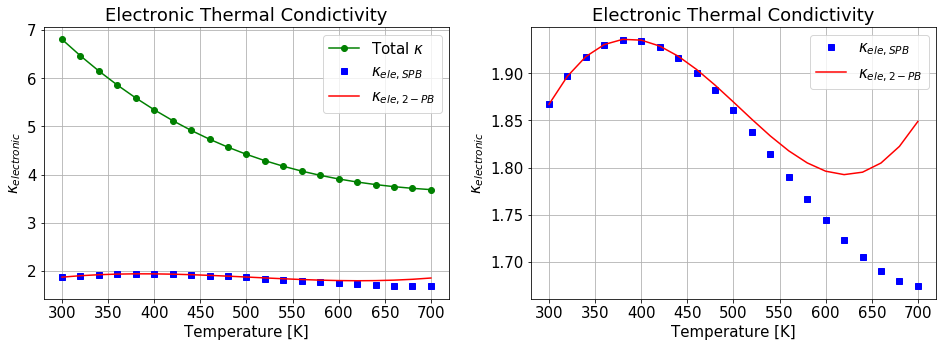

In [262]:
kappa_ele_plot()

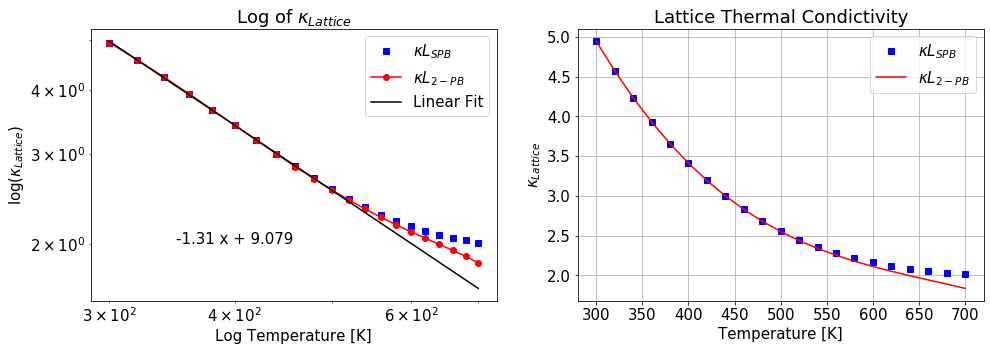

 
-1.31 x + 9.079


In [263]:
kappa_lat_plot()

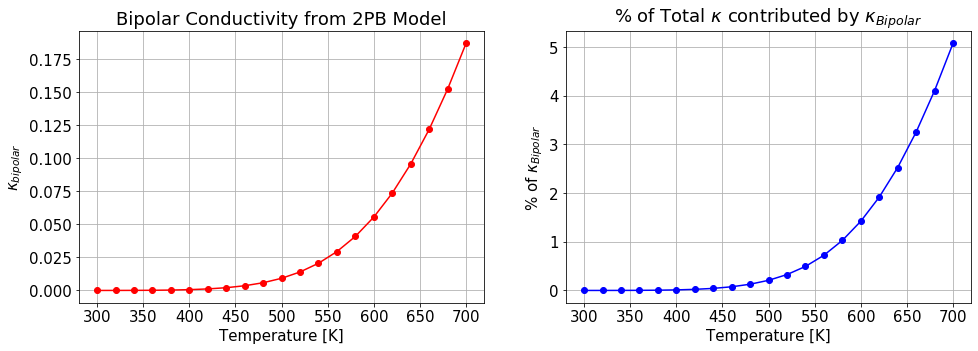

In [257]:
kappa_bip_plot()

In [239]:
data_DPB_names = ['T', 'eta_2PB', 'Edef_p_2PB', 'Tau0_p_2PB', 'S_p_2PB', 'S_n_2PB', \
    'S_2PB', 'Sigma_p_2PB', 'Sigma_n_2PB', 'Sigma_2PB', 'kappaE_p_2PB', 'kappaE_n_2PB', 'kappa_bip_2PB', \
    'kappaE_tot_2PB', 'kappaL_2PB', 'p_2PB', 'n_2PB', 'L_2PB', 'muH_2PB', '%kappa_bipolar'] 

data_DPB_list = [T, eta_optim_DPB, Edef_p_DPB, Tau0_p_DPB, S_p, S_n, \
    S_DPB, Sigma_p_DPB, Sigma_n_DPB, Sigma_DPB, kappaE_p, kappaE_n, kappa_bip_DPB, \
    kappaE_tot_DPB, kappaL_DPB, p_DPB, n_DPB, L_DPB, muH_DPB, kappa_bip_DPB_per] 
            
DPB_data_df = pd.DataFrame(np.array(data_DPB_list).T)
DPB_data_df.columns = data_DPB_names
DPB_data_df.head()            

,T,eta_2PB,Edef_p_2PB,Tau0_p_2PB,S_p_2PB,S_n_2PB,S_2PB,Sigma_p_2PB,Sigma_n_2PB,Sigma_2PB,kappaE_p_2PB,kappaE_n_2PB,kappa_bip_2PB,kappaE_tot_2PB,kappaL_2PB,p_2PB,n_2PB,L_2PB,muH_2PB,%kappa_bipolar
0,300.0,4.30,8.78,7.27e-14,6.40e-05,-1.53e-03,6.40e-05,293189.99,0.01,293190.0,1.87,4.61e-08,7.88e-06,1.87,4.94,2.45e+26,8.45e+18,2.12e-08,NaN,2.14e-04
1,320.0,4.10,8.74,6.64e-14,6.68e-05,-1.43e-03,6.68e-05,281709.97,0.03,281710.0,1.90,1.51e-07,2.28e-05,1.90,4.57,2.53e+26,2.85e+19,2.10e-08,NaN,6.19e-04
2,340.0,3.90,8.71,6.11e-14,6.97e-05,-1.35e-03,6.97e-05,270489.91,0.09,270490.0,1.92,4.38e-07,5.91e-05,1.92,4.23,2.59e+26,8.55e+19,2.09e-08,NaN,1.60e-03
3,360.0,3.72,8.68,5.65e-14,7.26e-05,-1.27e-03,7.26e-05,259539.78,0.22,259540.0,1.93,1.15e-06,1.39e-04,1.93,3.93,2.64e+26,2.31e+20,2.07e-08,NaN,3.78e-03
4,380.0,3.53,8.66,5.24e-14,7.57e-05,-1.20e-03,7.57e-05,248869.51,0.49,248870.0,1.94,2.77e-06,3.02e-04,1.94,3.66,2.68e+26,5.73e+20,2.05e-08,NaN,8.20e-03


# Four Band Model

In [446]:
del E_n1, E_n2

In [278]:
kb1 = 8.6173303e-5
# BG1 = 0.7650; BG2 = 4.3; BG3 = 0.43; P = 0.34; Q = 3.5; R = 0.195;
BG1 = 0.78; BG2 = -4; BG3 = 0.4; P = 0.38; Q = 2.8; R = 0.165; #%% Literature values

E_n1 = lambda T1,x: (1/(kb1*T1))*( (BG1 - (BG2*1e-4)*T1 + BG3)*(1-x) + (P - (Q*1e-4)*T1)*x)
E_n2 = lambda T1,x: (1/(kb1*T1))*( (BG1 - (BG2*1e-4)*T1)*(1-x) + (P + R - (Q*1e-4)*T1)*x)

if x<=0.70796: #% Si rich side
    Eg_red = E_n2
else: #% Sn rich side
    Eg_red = E_n1


In [279]:
Nv_n1 = 3; Edef_n2 = 10; # Mg2Sn side

Nv_n2 = 3; Edef_n1 = 17;   # Mg2Si side

In [280]:
if x > 0.70796:  # Tin-rich side
    mD_p1 = (  ((2.2 - 1.1*x)**1.5 - (0.5**1.5))**(2/3)  )*m0; 
    Nv_p1 = 1; Edef_p1 = np.zeros(len(T));
    mD_p2 = 0.5*m0; 
    Nv_p2 = 1; Edef_p2 = np.zeros(len(T));
else:
    Nv_p1 = 1; Edef_p1 = np.zeros(len(T)); 
    Nv_p2 = 1; Edef_p2 = np.zeros(len(T));
    mD_p1 = ( 1**(3/2) )*m0
    mD_p2 = ( 3.6593**(3/2))*m0

mD_n2 = 1.7598*m0
# mD_n1 = @(T1) (0.49 + (2e-4*T1)) * (Nv_n1**(2/3))*m0; # mD_n1 = 1.2*m0 at 300K from this equation. 5169

# mD_n2 = 0.38*(Nv_n2**(2/3))*m0; 
mD_n1 = 1.1*m0 #Mg2Si Side

##################################

In [281]:
S_iter=0; Sigma_iter = 0; A_n1_iter = 0; A_p1_iter = 0; A_n2_iter = 0; A_p2_iter = 0

In [282]:
Sigma_p1 = np.ones(len(T))*np.nan; Sigma_p2 = np.ones(len(T))*np.nan; Sigma_n1 = np.ones(len(T))*np.nan; 
Sigma_n2 = np.ones(len(T))*np.nan; Sigma_4PB = np.ones(len(T))*np.nan;
S_p1 = np.ones(len(T))*np.nan; S_p2 = np.ones(len(T))*np.nan; 
S_n1 = np.ones(len(T))*np.nan; S_n2 = np.ones(len(T))*np.nan; S_4PB = np.ones(len(T))*np.nan; 

p1 = np.ones(len(T))*np.nan; p2 = np.ones(len(T))*np.nan; n1 = np.ones(len(T))*np.nan; n2 = np.ones(len(T))*np.nan;

kappaE_p1 = np.ones(len(T))*np.nan; kappaE_p2 = np.ones(len(T))*np.nan; 
kappaE_n1 = np.ones(len(T))*np.nan; kappaE_n2 = np.ones(len(T))*np.nan; 
kappaE_tot_4PB = np.ones(len(T))*np.nan; kappaL_4PB = np.ones(len(T))*np.nan; 

kappa_bip_4PB = np.ones(len(T))*np.nan; kappaE_bip4 = np.ones(len(T))*np.nan; 
kappaE_bip5 = np.ones(len(T))*np.nan; kappaE_bip6 = np.ones(len(T))*np.nan
kappaE_bip1 = np.ones(len(T))*np.nan; kappaE_bip2 = np.ones(len(T))*np.nan; 
kappaE_bip3 = np.ones(len(T))*np.nan; 

Edef_p1_optim = np.ones(len(T))*np.nan; Edef_p2_optim = np.ones(len(T))*np.nan; 
eta_optim = np.ones(len(T))*np.nan; eta_optim_4PB = np.ones(len(T))*np.nan

#  muH_4PB = np.ones(len(T))*np.nan; L_4PB = np.ones(len(T))*np.nan; ZT_4PB = np.ones(len(T))*np.nan;

tau0_AS_n1 = np.ones(len(T))*np.nan; tau0_AP_n1 = np.ones(len(T))*np.nan; Tau0_n1 = np.ones(len(T))*np.nan
tau0_AS_n2 = np.ones(len(T))*np.nan; tau0_AP_n2 = np.ones(len(T))*np.nan; Tau0_n2 = np.ones(len(T))*np.nan

tau0_AS_p1_optim = np.ones(len(T))*np.nan; tau0_AP_p1_optim = np.ones(len(T))*np.nan;
tau0_AS_p2_optim = np.ones(len(T))*np.nan; tau0_AP_p2_optim = np.ones(len(T))*np.nan; 
Tau0_p2_optim = np.ones(len(T))*np.nan

print(tau0_AS_p1_optim)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]


In [283]:
def solve_sbk_sigma1(var):
    eta = var[0];
    Tau0_p1 = var[1];

    tau0_AS_p1 = ((8*hbar**4)*N_A) / (  3*np.sqrt(2)*pi*x*(1-x)*(U*e)**2*(mD_p1/(Nv_p1**(2/3)))**1.5*(kb *T_iter)**0.5  );
    if (x>0 and x<1):
        tau0_AP_p1 = lambda Tau0_p1: (Tau0_p1 * tau0_AS_p1)/(tau0_AS_p1 - Tau0_p1);
    else:
        tau0_AP_p1 = lambda Tau0_p1: Tau0_p1;

    Edef_p1 = lambda Tau0_p1: np.sqrt( (pi* hbar**4* v_l**2*d) / (np.sqrt(2)*tau0_AP_p1(Tau0_p1) * ((mD_p1/(Nv_p1**(2/3)))*kb*T_iter)**1.5)  ) / e;
    Edef_p2 = Edef_p1;

    tau0_AS_p2 = ((8*hbar**4)*N_A) / (  3*np.sqrt(2)*pi*x*(1-x)*(U*e)**2*(mD_p2/(Nv_p2**(2/3)))**1.5*(kb *T_iter)**0.5  );
    tau0_AP_p2 = lambda Tau0_p1: (pi* hbar**4* v_l**2*d) / (np.sqrt(2)*(Edef_p2(Tau0_p1)*e)**2 * ( (mD_p2/(Nv_p2**(2/3)))*kb *T_iter)**1.5);

    if (x>0 and x<1): 
        Tau0_p2 = lambda Tau0_p1: np.reciprocal( np.reciprocal(tau0_AP_p2(Tau0_p1)) + np.reciprocal(tau0_AS_p2) );
    else:
        Tau0_p2 = lambda Tau0_p1: tau0_AP_p2(Tau0_p1);

#     print([T_iter, A_p1, A_p2, A_n1, A_n2])

    Sigma_p1_fun = lambda eta, Tau0_p1: (A_p1)*Tau0_p1* I2(eta);
    Sigma_p2_fun = lambda eta, Tau0_p1: (A_p2)*Tau0_p2(Tau0_p1)* I2(eta);

    Sigma_n1_fun = lambda eta: (A_n1)*Tau0_n1_iter* I2(-eta-E_n1(T_iter,x));
    Sigma_n2_fun = lambda eta: (A_n2)*Tau0_n2_iter* I2(-eta-E_n2(T_iter,x));

    Sigma_4PB_fun = lambda eta, Tau0_p1: Sigma_p1_fun(eta, Tau0_p1) + Sigma_p2_fun(eta, Tau0_p1) + Sigma_n1_fun(eta) + Sigma_n2_fun(eta);

    S_p1_fun = lambda eta: (kb/e)*I1(eta) / I2(eta);
    S_p2_fun = lambda eta: (kb/e)*I1(eta) / I2(eta);

    S_n1_fun = lambda eta: (-kb/e)*I1(-eta-E_n1(T_iter,x)) / I2(-eta-E_n1(T_iter,x));
    S_n2_fun = lambda eta: (-kb/e)*I1(-eta-E_n2(T_iter,x)) / I2(-eta-E_n2(T_iter,x));

    S1 = lambda eta, Tau0_p1: S_p1_fun(eta)*Sigma_p1_fun(eta, Tau0_p1);
    S2 = lambda eta, Tau0_p1: S_p2_fun(eta)*Sigma_p2_fun(eta, Tau0_p1);
    S3 = lambda eta: S_n1_fun(eta)*Sigma_n1_fun(eta);
    S4 = lambda eta: S_n2_fun(eta)*Sigma_n2_fun(eta);
    S_4PB_fun = lambda eta, Tau0_p1: (S1(eta, Tau0_p1) + S2(eta, Tau0_p1) + S3(eta) + S4(eta)) / Sigma_4PB_fun(eta, Tau0_p1);

    Fun = np.zeros(2)
    Fun[0] = (S_4PB_fun(eta, Tau0_p1) - S)*1e6;
    Fun[1] = (Sigma_4PB_fun(eta, Tau0_p1) - Sigma)*1e-2;

    return Fun
    
def solver_4Band(eta_DPB_iter, Tau0_n_iter): 
    A = 0; B = 0
    x_1 = np.linspace(eta_DPB_iter-0.25, eta_DPB_iter+0.25, 11)
#     print(x_1)
    eta_final_4PB = np.zeros(len(x_1)); Tau0_p_4PB = np.zeros(len(x_1))
#    exitflag_final = np.zeros(len(x_1)); FO_opt = np.zeros(len(x_1))
    
    for i in range(0,len(x_1)):    
        x0 = [x_1[i], Tau0_n_iter]
        sol = fsolve(solve_sbk_sigma1,x0, full_output=1, xtol=1e-15, maxfev=500 )
#         print(sol[0])
        print('%1.20f, %1.20E' %(sol[0][0], sol[0][1]))

        eta_final_4PB[i] = sol[0][0]
        Tau0_p_4PB[i] = sol[0][1]
        
#     print(stats.mode(eta_final_4PB)[0])
#     print(stats.mode(eta_final_4PB)[1])
#     print(stats.mode(Tau0_p_4PB)[0])    
#     A = stats.mode(eta_final_4PB)[0]
#     B = stats.mode(Tau0_p_4PB)[0]
    A = eta_final_4PB.mean(); B = Tau0_p_4PB.mean()
    
#     print(stats.mode(eta_final_4PB),stats.mode(Tau0_p_4PB))
    print(A,B)
    return A, B

In [284]:
tau0_AS_p1_optim

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])

In [285]:
Sigma_p1

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])

In [288]:
eta_optim_4PB = np.ones(len(T))*np.nan;  Tau0_p1_optim_4PB = np.ones(len(T))*np.nan;

# Sigma_p1 = np.zeros(len(T)); Sigma_p2 = np.zeros(len(T)); Sigma_n1 = np.zeros(len(T))
# Sigma_n2 = np.zeros(len(T)); Sigma_4PB = np.zeros(len(T))

print('T \t eta_SPB \t eta_optim_DPB \t eta_optim_4PB \t Tau0_p_DPB \t Tau0_p1_optim_4PB')
for k in range(0,len(T)):
    T_iter = T[k]
#    print('=======================================')
    S = S_exp[k] #V/K
    Sigma = Sigma_exp[k] #S/m
#     kappa_tot_exp = kappa_exp[k]

    A_p1 = (-8*np.pi*e**2*(Nv_p1)**(2/3)*(mD_p1)**(0.5)*(2*kb*T[k])**(3/2)) / (3*h**3)
    A_p2 = (-8*np.pi*e**2*(Nv_p2)**(2/3)*(mD_p2)**(0.5)*(2*kb*T[k])**(3/2)) / (3*h**3)  
    A_n1 = (-8*np.pi*e**2*(Nv_n1)**(2/3)*(mD_n1)**(0.5)*(2*kb*T[k])**(3/2)) / (3*h**3)
    A_n2 = (-8*np.pi*e**2*(Nv_n2)**(2/3)*(mD_n2)**(0.5)*(2*kb*T[k])**(3/2)) / (3*h**3)
    
    tau0_AS_n1[k] = ((8*hbar**4)*N_A) / (  3*np.sqrt(2)*np.pi*x*(1-x)*(U*e)**2*(mD_n1/(Nv_n1**(2/3)))**1.5*(kb *T[k])**0.5  );
    tau0_AS_n2[k] = ((8*hbar**4)*N_A) / (  3*np.sqrt(2)*np.pi*x*(1-x)*(U*e)**2*(mD_n2/(Nv_n2**(2/3)))**1.5*(kb *T[k])**0.5  );
    tau0_AP_n1[k] = (np.pi* hbar**4* v_l**2*d) / (np.sqrt(2)*(Edef_n1*e)**2 * ( (mD_n1/(Nv_n1**(2/3)))*kb *T[k])**1.5);
    tau0_AP_n2[k] = (np.pi* hbar**4* v_l**2*d) / (np.sqrt(2)*(Edef_n2*e)**2 * ( (mD_n2/(Nv_n2**(2/3)))*kb *T[k])**1.5);

    if (x>0 and x<1): 
        Tau0_n1[k] = np.reciprocal( np.reciprocal(tau0_AP_n1[k]) + np.reciprocal(tau0_AS_n1[k]) )
        Tau0_n2[k] = np.reciprocal( np.reciprocal(tau0_AP_n2[k]) + np.reciprocal(tau0_AS_n2[k]) )
    else:
        Tau0_n1[k] = tau0_AP_n1[k]
        Tau0_n2[k] = tau0_AP_n2[k]
    
    Tau0_n1_iter = Tau0_n1[k]
    Tau0_n2_iter = Tau0_n2[k]
    Tau0_p_DPB_iter = Tau0_p_DPB[k]
#    E_def_av = Edef_p_DPB[k]*e
    Tau0_p2_fun = lambda Tau0_p1: Tau0_p1

    ##############################################################################
    eta_optim_4PB[k], Tau0_p1_optim_4PB[k] = solver_4Band(eta_optim_DPB[k],Tau0_p_DPB[k])
    ##############################################################################
    print('%d \t %1.5f \t %1.5f \t %1.5f \t %1.4E \t %1.4E' \
       %(T_iter, eta_SPB[k], eta_optim_DPB[k], eta_optim_4PB[k],\
         Tau0_p_DPB[k], Tau0_p1_optim_4PB[k]))

T 	 eta_SPB 	 eta_optim_DPB 	 eta_optim_4PB 	 Tau0_p_DPB 	 Tau0_p1_optim_4PB
4.30149095363030298245, 5.05151492139193668416E-14
4.30149095363030298245, 5.05151492139193857743E-14
4.30149095363030298245, 5.05151492139193605307E-14
4.30149095363030387063, 5.05151492139193794634E-14
4.30149095363030298245, 5.05151492139193668416E-14
4.30149095363030298245, 5.05151492139193857743E-14
4.30149095363030209427, 5.05151492139193857743E-14
4.30149095363030298245, 5.05151492139193605307E-14
4.30149095363030298245, 5.05151492139193731525E-14
4.30149095363030298245, 5.05151492139193857743E-14
4.30149095363030298245, 5.05151492139193794634E-14
4.301490953630304 5.051514921391938e-14
300 	 4.30150 	 4.30149 	 4.30149 	 7.2681E-14 	 5.0515E-14
4.10007163189794265890, 4.61825974849311927249E-14
4.10007163189794177072, 4.61825974849312305902E-14
4.10007163189794177072, 4.61825974849312242793E-14
4.10007163189794177072, 4.61825974849312305902E-14
4.10007163189794177072, 4.61825974849312242793E-14
4.10007

2.42370966908474061441, 2.15423040011305834991E-14
2.42370966908473972623, 2.15423040011305929654E-14
2.42370966908473972623, 2.15423040011305929654E-14
2.42370966908473972623, 2.15423040011305929654E-14
2.42370966908474061441, 2.15423040011305803436E-14
2.42370966908473972623, 2.15423040011305929654E-14
2.42370966908473839396, 2.15423040011306024317E-14
2.4237096690847397 2.1542304001130587e-14
540 	 2.42900 	 2.42006 	 2.42371 	 3.1033E-14 	 2.1542E-14
2.32630154697231317229, 2.02543916007103663480E-14
2.32630154697231272820, 2.02543916007103695035E-14
2.32630154697231228411, 2.02543916007103758144E-14
2.32630154697231184002, 2.02543916007103758144E-14
2.32630154697231317229, 2.02543916007103631926E-14
2.32630154697231272820, 2.02543916007103726589E-14
2.32630154697231317229, 2.02543916007103663480E-14
2.32630154697231184002, 2.02543916007103821252E-14
2.32630154697231184002, 2.02543916007103758144E-14
2.32630154697231228411, 2.02543916007103726589E-14
2.32630154697231184002, 2.02543

In [289]:
print(Tau0_p1_optim_4PB)

[5.05e-14 4.62e-14 4.25e-14 3.93e-14 3.64e-14 3.39e-14 3.16e-14 2.96e-14
 2.77e-14 2.60e-14 2.44e-14 2.29e-14 2.15e-14 2.03e-14 1.90e-14 1.79e-14
 1.69e-14 1.59e-14 1.49e-14 1.41e-14 1.33e-14]


In [316]:
eta_optim_4PB

array([4.3 , 4.1 , 3.9 , 3.72, 3.53, 3.36, 3.2 , 3.05, 2.9 , 2.77, 2.65,
       2.53, 2.42, 2.33, 2.24, 2.16, 2.09, 2.02, 1.97, 1.92, 1.89])

In [290]:
for k in range(0,len(T)):
    T_iter = T[k]
#    print('=======================================')
    S = S_exp[k] #V/K
    Sigma = Sigma_exp[k] #S/m
    kappa_tot_exp = kappa_exp[k]
    
    A_p1 = (-8*np.pi*e**2*(Nv_p1)**(2/3)*(mD_p1)**(0.5)*(2*kb*T[k])**(3/2)) / (3*h**3)
    A_p2 = (-8*np.pi*e**2*(Nv_p2)**(2/3)*(mD_p2)**(0.5)*(2*kb*T[k])**(3/2)) / (3*h**3)  
    A_n1 = (-8*np.pi*e**2*(Nv_n1)**(2/3)*(mD_n1)**(0.5)*(2*kb*T[k])**(3/2)) / (3*h**3)
    A_n2 = (-8*np.pi*e**2*(Nv_n2)**(2/3)*(mD_n2)**(0.5)*(2*kb*T[k])**(3/2)) / (3*h**3)
    
    tau0_AS_p1_optim[k] =  ((8*hbar**4)*N_A) / (  3*np.sqrt(2)*np.pi*x*(1-x)*(U*e)**2*(mD_p1/(Nv_p1**(2/3)))**1.5*(kb *T[k])**0.5  )
    

          
    if (x>0 and x<1):
        tau0_AP_p1_optim[k] =  (Tau0_p1_optim_4PB[k] * tau0_AS_p1_optim[k])/(tau0_AS_p1_optim[k] - Tau0_p1_optim_4PB[k] )
    else:
        tau0_AP_p1_optim[k] =  Tau0_p1_optim_4PB[k]

#     print(k, tau0_AP_p1_optim[k])
        
    Edef_p1_optim[k] =  np.sqrt( (np.pi* hbar**4* v_l**2*d) / (np.sqrt(2)*tau0_AP_p1_optim[k] * ((mD_p1/(Nv_p1**(2/3)))*kb*T[k])**1.5)  ) / e
#     print(k, Edef_p1_optim[k])
    
    Edef_p2_optim[k] =  Edef_p1_optim[k]
    tau0_AS_p2_optim[k] = ((8*hbar**4)*N_A) / (  3*np.sqrt(2)*np.pi*x*(1-x)*(U*e)**2*(mD_p2/(Nv_p2**(2/3)))**1.5*(kb *T[k])**0.5  )
    tau0_AP_p2_optim[k] = (np.pi* hbar**4* v_l**2*d) / (np.sqrt(2)*(Edef_p2_optim[k]*e)**2 * ( (mD_p2/(Nv_p2**(2/3)))*kb *T[k])**1.5)
#     print(tau0_AS_p2_optim[k])
    
    if (x>0 and x<1):
        Tau0_p2_optim[k] =  np.reciprocal( np.reciprocal(tau0_AS_p2_optim[k]) + np.reciprocal(tau0_AP_p2_optim[k]) )
    else:
        Tau0_p2_optim[k] =  tau0_AP_p2_optim[k]
    
    
    Sigma_p1[k] = (A_p1)*Tau0_p1_optim_4PB[k]* I2(eta_optim_4PB[k])
    Sigma_p2[k] = (A_p2)*Tau0_p2_optim[k]* I2(eta_optim_4PB[k])
    Sigma_n1[k] = (A_n1)*Tau0_n1_iter* I2(-eta_optim_4PB[k]-E_n1(T_iter,x))
    Sigma_n2[k] = (A_n2)*Tau0_n2_iter* I2(-eta_optim_4PB[k]-E_n2(T_iter,x))
    Sigma_4PB[k] = Sigma_p1[k] + Sigma_p2[k] + Sigma_n1[k] + Sigma_n2[k]
    
    S_p1[k] = ( (kb/e)*I1(eta_optim_4PB[k]) ) / I2(eta_optim_4PB[k])
    S_p2[k] = ( (kb/e)*I1(eta_optim_4PB[k]) ) / I2(eta_optim_4PB[k])
    S_n1[k] = ( (-kb/e)*I1(-eta_optim_4PB[k]-E_n1(T_iter,x)) ) / I2(-eta_optim_4PB[k]-E_n1(T_iter,x))
    S_n2[k] = ( (-kb/e)*I1(-eta_optim_4PB[k]-E_n2(T_iter,x)) ) / I2(-eta_optim_4PB[k]-E_n2(T_iter,x))
    S_4PB[k] = (  S_p1[k]*Sigma_p1[k] + S_p2[k]*Sigma_p2[k] + S_n1[k]*Sigma_n1[k] + S_n2[k]*Sigma_n2[k] ) / Sigma_4PB[k]
    
    kappaE_p1[k] = ( ((A_p1/e**2)*kb**2*T[k]*(Tau0_p1_optim_4PB[k])) * I3(eta_optim_4PB[k]) ) - (T[k]*Sigma_p1[k]*S_p1[k]**2);
    kappaE_p2[k] = ( ((A_p2/e**2)*kb**2*T[k]*(Tau0_p2_optim[k])) * I3(eta_optim_4PB[k]) ) - (T[k]*Sigma_p2[k]*S_p2[k]**2);
    kappaE_n1[k] = ( ((A_n1/e**2)*kb**2*T[k]*Tau0_n1[k]) * I3(-eta_optim_4PB[k]-E_n1(T_iter,x)) ) - (T[k]*Sigma_n1[k]*S_n1[k]**2);    
    kappaE_n2[k] = ( ((A_n2/e**2)*kb**2*T[k]*Tau0_n2[k]) * I3(-eta_optim_4PB[k]-E_n2(T_iter,x)) ) - (T[k]*Sigma_n2[k]*S_n2[k]**2);

    kappaE_bip1[k] =   (  T[k]*(Sigma_p1[k]*Sigma_n1[k]) * ((S_p1[k] - S_n1[k])**2) ) / (Sigma_p1[k] + Sigma_n1[k]) ;
    kappaE_bip2[k] =   (  T[k]*(Sigma_n1[k]*Sigma_n2[k]) * ((S_n1[k] - S_n2[k])**2) ) / (Sigma_n1[k] + Sigma_n2[k]) ;
    kappaE_bip3[k] =   (  T[k]*(Sigma_p1[k]*Sigma_n2[k]) * ((S_p1[k] - S_n2[k])**2) ) / (Sigma_p1[k] + Sigma_n2[k]) ;
    
    kappaE_bip4[k] =   (  T[k]*(Sigma_p1[k]*Sigma_p2[k]) * ((S_p1[k] - S_p2[k])**2) ) / (Sigma_p1[k] + Sigma_p2[k]) ;
    kappaE_bip5[k] =   (  T[k]*(Sigma_p2[k]*Sigma_n1[k]) * ((S_p2[k] - S_n1[k])**2) ) / (Sigma_p2[k] + Sigma_n1[k]) ;
    kappaE_bip6[k] =   (  T[k]*(Sigma_p2[k]*Sigma_n2[k]) * ((S_p2[k] - S_n2[k])**2) ) / (Sigma_p2[k] + Sigma_n2[k]) ;
    kappa_bip_4PB[k] = kappaE_bip1[k] + kappaE_bip2[k] + kappaE_bip3[k] + kappaE_bip4[k] + kappaE_bip5[k]+ kappaE_bip6[k];

    kappaE_tot_4PB[k] = (kappaE_p1[k] + kappaE_p2[k] + kappaE_n1[k] + kappaE_n2[k] ) + kappa_bip_4PB[k];
    kappaL_4PB[k] = kappa_exp[k] - kappaE_tot_4PB[k];
    
    print([T_iter, kappaE_p1[k], kappaE_p2[k],  kappaE_n1[k], kappaE_n2[k]])
# print(T, eta_optim_DPB, eta_optim_4PB, kappa_bip_4PB, kappaL_4PB)

[300, 0.6854535362871408, 1.1815461282121833, 2.915604310016604e-06, 1.639536051447079e-08]
[320, 0.6964063594826604, 1.20042598680881, 8.048997467609841e-06, 6.742178659310223e-08]
[340, 0.7040665966934164, 1.2136302714735028, 1.9810434953000353e-05, 2.3596612198271344e-07]
[360, 0.708728789489902, 1.2216666963455722, 4.417477103698983e-05, 7.197943909676344e-07]
[380, 0.7106899628252575, 1.2250472562792103, 9.039237357087051e-05, 1.9501212744148776e-06]
[400, 0.7102766602502726, 1.2243348286216063, 0.00017147885898861467, 4.763779287591034e-06]
[420, 0.7077787098626185, 1.220029002693585, 0.00030412805776495604, 1.0622193774254991e-05]
[440, 0.7035151150069902, 1.212679658460539, 0.0005076779659526867, 2.1834143864802312e-05]
[460, 0.6977922446115774, 1.2028148973936015, 0.0008021056830747209, 4.171194505017443e-05]
[480, 0.6908766880795338, 1.1908942512632619, 0.0012048212434325905, 7.454773121968821e-05]
[500, 0.6830603152453214, 1.1774208288210182, 0.0017264923766345014, 0.0001252

In [314]:
Edef_p1_optim

array([ 9.69,  9.66,  9.62,  9.59,  9.56,  9.54,  9.52,  9.5 ,  9.5 ,
        9.5 ,  9.51,  9.53,  9.55,  9.59,  9.63,  9.68,  9.73,  9.8 ,
        9.87,  9.94, 10.02])

In [315]:
Edef_p2_optim

array([ 9.69,  9.66,  9.62,  9.59,  9.56,  9.54,  9.52,  9.5 ,  9.5 ,
        9.5 ,  9.51,  9.53,  9.55,  9.59,  9.63,  9.68,  9.73,  9.8 ,
        9.87,  9.94, 10.02])

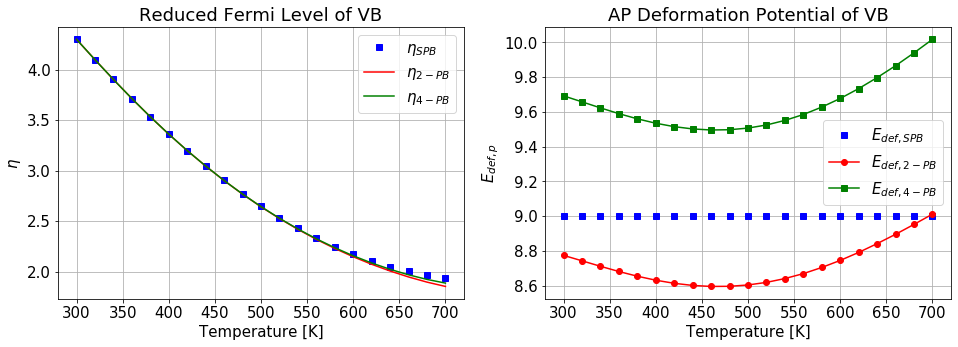

In [335]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].plot(T, eta_SPB, 'bs')
axes[0].plot(T, eta_optim_DPB, 'r-')
axes[0].plot(T, eta_optim_4PB, 'g-')
axes[0].set_xlabel('Temperature [K]')
axes[0].set_ylabel('$\eta$')
axes[0].set_title('Reduced Fermi Level of VB')
axes[0].legend(['$\eta_{SPB}$','$\eta_{2-PB}$', '$\eta_{4-PB}$'])
axes[0].grid(True)

axes[1].plot(T, 9.0*np.ones(len(T)), 'bs')
axes[1].plot(T, Edef_p_DPB, 'r-o')
axes[1].plot(T, Edef_p1_optim, 'g-s')
axes[1].set_xlabel('Temperature [K]')
axes[1].set_ylabel('$E_{def,p}$')
axes[1].set_title('AP Deformation Potential of VB')
axes[1].legend(['$E_{def,SPB}$','$E_{def,2-PB}$','$E_{def,4-PB}$'])
axes[1].grid(True)

plt.show()
fig.savefig(r'Plots/eta_4PB.png')

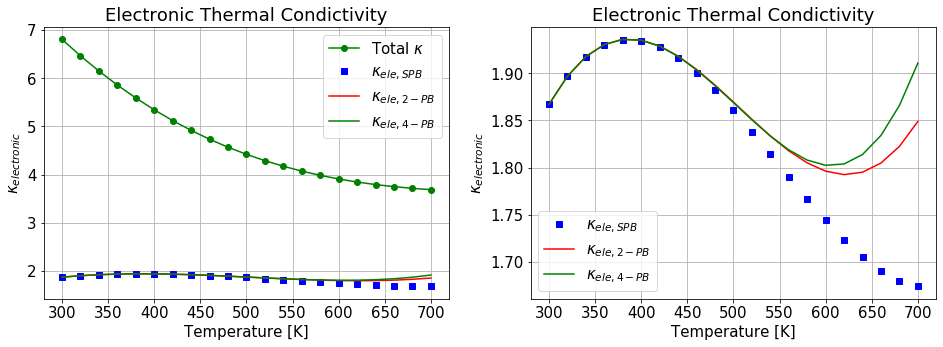

In [336]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

col_idx = [1,2,3]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].plot(T, kappa_exp, 'g-o')
axes[0].plot(T, (kappa_exp - kappaL_SPB), 'bs')
axes[0].plot(T, kappaE_tot_DPB, 'r-')
axes[0].plot(T, kappaE_tot_4PB, 'g-')
axes[0].set_xlabel('Temperature [K]')
axes[0].set_ylabel('$\kappa _{electronic}$')
axes[0].set_title('Electronic Thermal Condictivity')
axes[0].legend(['Total $\kappa$', '$\kappa _{ele,SPB}$','$\kappa _{ele,2-PB}$','$\kappa _{ele,4-PB}$'])
axes[0].grid(True)


axes[1].plot(T, (kappa_exp - kappaL_SPB), 'bs')
axes[1].plot(T, kappaE_tot_DPB, 'r-')
axes[1].plot(T, kappaE_tot_4PB, 'g-')
axes[1].set_xlabel('Temperature [K]')
axes[1].set_ylabel('$\kappa _{electronic}$')
axes[1].set_title('Electronic Thermal Condictivity')
axes[1].legend(['$\kappa _{ele,SPB}$','$\kappa _{ele,2-PB}$','$\kappa _{ele,4-PB}$'])
axes[1].grid(True)

plt.show()

fig.savefig(r'Plots/kappa_ele_4PB.png')


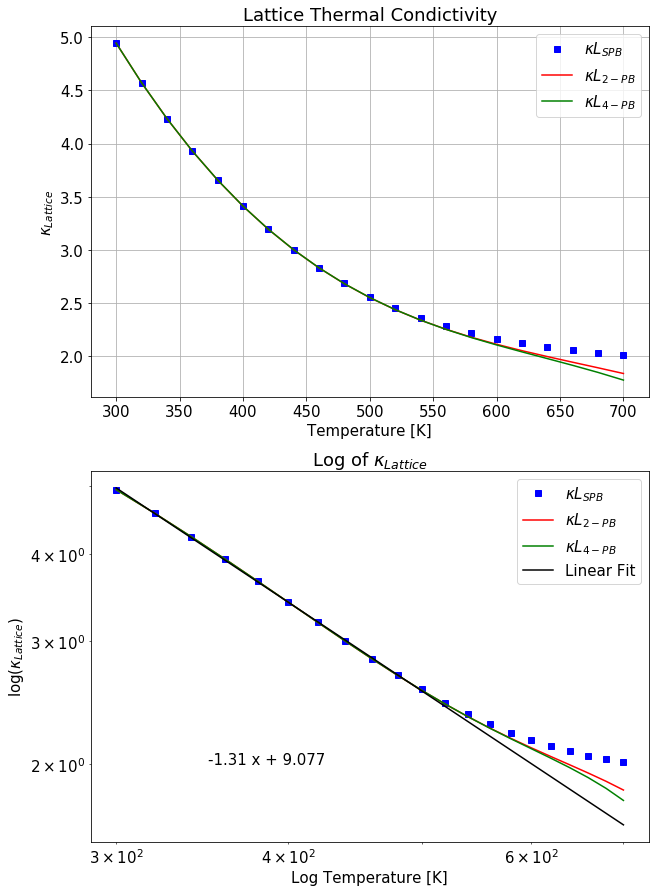

 
-1.31 x + 9.077


In [337]:
# plot of kappa lattice
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(2, 1, figsize=(10,15))

# axes[0].plot(np.log(T), np.log(kappaL_SPB), 'bs')
# axes[0].plot(np.log(T), np.log(kappaL_DPB), 'r-o')
p = np.poly1d(np.polyfit(np.log(T[:8]), np.log(kappaL_4PB[:8]),1))

axes[1].plot(T, kappaL_SPB, 'bs')
axes[1].plot(T, kappaL_DPB, 'r-')
axes[1].plot(T, kappaL_4PB, 'g-')
axes[1].plot(T, np.exp(p(np.log(T))), 'k-')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlabel('Log Temperature [K]')
axes[1].set_ylabel('log($\kappa_{Lattice}$)')
axes[1].set_title('Log of $\kappa _{Lattice}$')
axes[1].legend(['$\kappa L_{SPB}$','$\kappa L_{2-PB}$', '$\kappa L_{4-PB}$', 'Linear Fit'])
axes[1].annotate(p, xy=(350, 2))

axes[0].plot(T, kappaL_SPB, 'bs')
axes[0].plot(T, kappaL_DPB, 'r-')
axes[0].plot(T, kappaL_4PB, 'g-')
axes[0].set_xlabel('Temperature [K]')
axes[0].set_ylabel('$\kappa _{Lattice}$')
axes[0].set_title('Lattice Thermal Condictivity')
axes[0].legend(['$\kappa L_{SPB}$','$\kappa L_{2-PB}$', '$\kappa L_{4-PB}$'])
axes[0].grid(True)

plt.show()
fig.savefig(r'Plots/kappa_lat_4PB.png')

print(p)

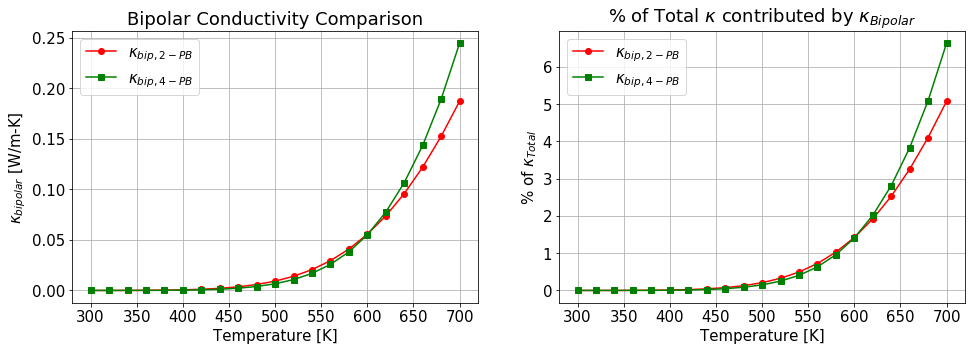

In [338]:
# Kappa Bipolar Plots
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

col_idx = [1,2,3]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].plot(T, kappa_bip_DPB, 'r-o')
axes[0].plot(T, kappa_bip_4PB, 'g-s')
axes[0].set_xlabel('Temperature [K]')
axes[0].set_ylabel('$\kappa_{bipolar}$ [W/m-K]')
axes[0].set_title('Bipolar Conductivity Comparison')
axes[0].legend(['$\kappa_{bip,2-PB}$','$\kappa_{bip,4-PB}$'])
axes[0].grid(True)  

axes[1].plot(T, 100*(kappa_bip_DPB/kappa_exp), 'r-o')
axes[1].plot(T, 100*(kappa_bip_4PB/kappa_exp), 'g-s')
axes[1].set_xlabel('Temperature [K]')
axes[1].set_ylabel('% of $\kappa_{Total}$')
axes[1].set_title('% of Total $\kappa$ contributed by $\kappa_{Bipolar}$')
axes[1].legend(['$\kappa_{bip,2-PB}$','$\kappa_{bip,4-PB}$'])
axes[1].grid(True)

plt.show()
fig.savefig(r'Plots/kappa_bip_4PB.png')



In [300]:
Sigma_4PB_data = np.array([T, Sigma_exp, Sigma_4PB, Sigma_p1, Sigma_p2,  Sigma_n1, Sigma_n2]).T
pd.DataFrame(Sigma_4PB_data, columns=['T', 'Sigma_exp', 'Sigma_4PB', 'Sigma_p1', 'Sigma_p2', 'Sigma_n1', 'Sigma_n2'])

,T,Sigma_exp,Sigma_4PB,Sigma_p1,Sigma_p2,Sigma_n1,Sigma_n2
0,300.0,293190.0,293190.00,107642.29,185547.70,1.61e-03,4.90e-06
1,320.0,281710.0,281709.99,103427.50,178282.48,5.42e-03,2.47e-05
2,340.0,270490.0,270489.97,99308.16,171181.80,1.62e-02,1.05e-04
3,360.0,259540.0,259539.92,95287.93,164251.95,4.39e-02,3.89e-04
4,380.0,248870.0,248869.83,91370.47,157499.26,1.09e-01,1.27e-03
5,400.0,238500.0,238499.67,87563.09,150936.32,2.49e-01,3.75e-03
6,420.0,228440.0,228439.37,83869.43,144569.40,5.33e-01,1.01e-02
7,440.0,218710.0,218708.89,80296.76,138411.03,1.07e+00,2.50e-02
8,460.0,209330.0,209328.15,76852.33,132473.71,2.05e+00,5.76e-02
9,480.0,200310.0,200307.07,73539.68,126763.55,3.72e+00,1.25e-01


In [301]:
# Seebeck_4PB = pd.DataFrame(data=T_fit, columns='T')
Seebeck_4PB_data = np.array([S_exp, S_4PB, S_p1, S_p2,  S_n1, S_n2]).T
Seebeck_4PB_df = pd.DataFrame(Seebeck_4PB_data*1e6, columns=['S_exp', 'Seebeck_4PB', 'S_p1', 'S_p2', 'S_n1', 'S_n2'])
Seebeck_4PB_df

,S_exp,Seebeck_4PB,S_p1,S_p2,S_n1,S_n2
0,64.01,64.01,64.01,64.01,-1529.73,-2079.75
1,66.77,66.77,66.77,66.77,-1433.20,-1948.84
2,69.66,69.66,69.66,69.66,-1346.47,-1831.78
3,72.64,72.64,72.64,72.64,-1268.10,-1726.45
4,75.70,75.70,75.70,75.70,-1196.97,-1631.19
5,78.81,78.81,78.81,78.81,-1132.16,-1544.67
6,81.95,81.95,81.95,81.95,-1072.91,-1465.78
7,85.08,85.09,85.09,85.09,-1018.60,-1393.60
8,88.19,88.20,88.21,88.21,-968.68,-1327.38
9,91.24,91.26,91.28,91.28,-922.72,-1266.47


In [332]:
Edef_p1_optim

array([ 9.69,  9.66,  9.62,  9.59,  9.56,  9.54,  9.52,  9.5 ,  9.5 ,
        9.5 ,  9.51,  9.53,  9.55,  9.59,  9.63,  9.68,  9.73,  9.8 ,
        9.87,  9.94, 10.02])